In [1]:
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df =  pd.read_csv('final_dataset.csv')

In [3]:
df.head()

,reviewText,overall,summary
0,These were not at all what I was expecting. Th...,1,They look like gloves you would use to clean a...
1,its too uglyand the size is too small.i can ha...,1,so bad
2,The sizes with this company run very small. T...,1,Size
3,The shoes are size one and are 1 &1/2 inches t...,1,One Star
4,I received these in the mail today and they ar...,1,"Dirty, worn shoes."


In [4]:
df.isnull().sum(axis = 0)

reviewText    590
overall         0
summary       225
dtype: int64

In [5]:
df.dropna(inplace =  True)

In [6]:
df = df [df['overall'] != 3]
df['Positivity'] = np.where(df['overall'] > 3 , 1 , 0)


In [7]:
df.head()

,reviewText,overall,summary,Positivity
0,These were not at all what I was expecting. Th...,1,They look like gloves you would use to clean a...,0
1,its too uglyand the size is too small.i can ha...,1,so bad,0
2,The sizes with this company run very small. T...,1,Size,0
3,The shoes are size one and are 1 &1/2 inches t...,1,One Star,0
4,I received these in the mail today and they ar...,1,"Dirty, worn shoes.",0


In [8]:
X=df['reviewText']
y=df['Positivity']

In [9]:
len(y)

527355

In [26]:
y.value_counts()

0    263811
1    263544
Name: Positivity, dtype: int64

In [11]:
df.shape

(527355, 4)

In [12]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

corpus = []
for i in X:
    review = re.sub('[^a-zA-Z]', ' ' ,i)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in stopwords.words('english')]
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review]
    review = " ".join(review)
    corpus.append(review)

In [13]:
corpus[0]

'expect look like glove would use clean bathroom take trash also super big around th wrist arm recommend'

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df = 5,max_features=5000).fit(corpus)
features_train_vectorized = vect.transform(corpus).todense()

In [15]:
len(vect.vocabulary_)

5000

In [16]:
features_train_vectorized

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = keras.Sequential()
model.add(layers.Dense(2000,input_shape=(5000,),activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1000, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(500,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
tf.sparse.reorder
model.fit(features_train_vectorized,y,epochs=5,validation_split=0.2)


Epoch 1/5
13184/13184 [==============================] - 249s 19ms/step - loss: 0.3215 - accuracy: 0.8635 - val_loss: 0.2836 - val_accuracy: 0.8804
Epoch 2/5
13184/13184 [==============================] - 252s 19ms/step - loss: 0.2621 - accuracy: 0.8990 - val_loss: 0.2758 - val_accuracy: 0.8865
Epoch 3/5
13184/13184 [==============================] - 254s 19ms/step - loss: 0.2294 - accuracy: 0.9136 - val_loss: 0.2751 - val_accuracy: 0.8884
Epoch 4/5
13184/13184 [==============================] - 254s 19ms/step - loss: 0.1952 - accuracy: 0.9294 - val_loss: 0.2994 - val_accuracy: 0.8884
Epoch 5/5
13184/13184 [==============================] - 255s 19ms/step - loss: 0.1653 - accuracy: 0.9416 - val_loss: 0.3296 - val_accuracy: 0.8857


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              10002000  
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5

In [20]:
model.save('model.h5')

In [21]:
import pickle

with open('tfidf_vocab.pkl','wb') as tf1:
    pickle.dump(vect.vocabulary_,tf1)

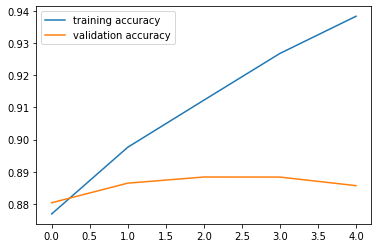

In [22]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'],label='training accuracy')                        
plt.plot(model.history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

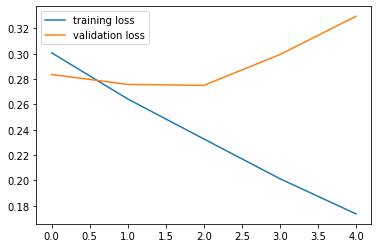

In [23]:
plt.plot(model.history.history['loss'],label='training loss')                         
plt.plot(model.history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

In [24]:
model.history.history

{'accuracy': [0.8769211173057556,
  0.897614061832428,
  0.9122199416160583,
  0.9267381429672241,
  0.9382768869400024],
 'loss': [0.3007679879665375,
  0.2642839848995209,
  0.23271261155605316,
  0.20131491124629974,
  0.17350870370864868],
 'val_accuracy': [0.8803842067718506,
  0.886471152305603,
  0.8883768916130066,
  0.888357937335968,
  0.8856936693191528],
 'val_loss': [0.283633828163147,
  0.2758117616176605,
  0.2750532627105713,
  0.29940614104270935,
  0.32964420318603516]}

In [55]:
predict_vectorised=vect.transform(['bad']).todense()

In [56]:
model.predict(predict_vectorised)

array([[0.16545323]], dtype=float32)